In [188]:
import pandas as pd
import numpy as np


%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import datasets
from sklearn import linear_model
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from datetime import date

filename = "data/listings.csv"
listings_df = pd.read_csv(filename)
listings_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,55,2,137,2019-11-11,1.24,1,64
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59740,-82.55498,Entire home/apt,765,1,102,2019-11-10,1.02,10,347
2,108061,"Walk downtown or UNCA, Pets OK!",320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,88,2019-10-09,0.88,2,210
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57972,-82.59617,Entire home/apt,107,1,227,2019-11-18,2.24,7,347
4,156805,"Private Room ""Ader"" at BPS Hostel",746673,BonPaul,NaN,28806,35.57755,-82.59697,Private room,71,1,64,2019-11-02,0.64,7,345


In [113]:
#Creating column for occupancy percentage
listings_df['occupancy'] = (365-listings_df['availability_365'])/365
listings_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,occupancy
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,55,2,137,2019-11-11,1.24,1,64,0.824658
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59740,-82.55498,Entire home/apt,765,1,102,2019-11-10,1.02,10,347,0.049315
2,108061,"Walk downtown or UNCA, Pets OK!",320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,88,2019-10-09,0.88,2,210,0.424658
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57972,-82.59617,Entire home/apt,107,1,227,2019-11-18,2.24,7,347,0.049315
4,156805,"Private Room ""Ader"" at BPS Hostel",746673,BonPaul,NaN,28806,35.57755,-82.59697,Private room,71,1,64,2019-11-02,0.64,7,345,0.054795


In [114]:
# Occupancy by Room Type
occup_byroomtype = listings_df.groupby('room_type').mean()['occupancy']
occup_byroomtype = pd.DataFrame(occup_byroomtype)
occup_byroomtype.head()

,occupancy
room_type,
Entire home/apt,0.448780
Hotel room,0.384571
Private room,0.577349
Shared room,0.392777


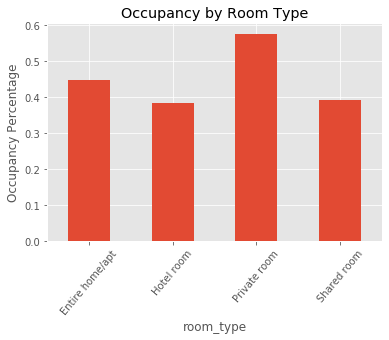

In [115]:
# Occupancy by Room Type
also = occup_byroomtype.plot.bar(legend=False,rot=50)
also
plt.ylabel("Occupancy Percentage")
plt.title("Occupancy by Room Type")
plt.savefig('Occupancy by Room Type')

In [116]:
#Reading reviews csv
filename_reviews = "data/reviews_full.csv"
reviews_df = pd.read_csv(filename_reviews)
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,38585,129120,2010-10-28,55877,Ritchie,Evelyne is an accommodating host who lives in ...
1,38585,147273,2010-11-30,279973,Cathy,Evelyne was very welcoming to her home; my fri...
2,38585,198797,2011-03-14,411638,NaN,I really enjoyed Evelyne's welcoming and bubbl...
3,38585,201932,2011-03-17,441855,Bill,Very gracious host and was helpful in all aspe...
4,38585,341616,2011-06-28,657560,Joakim,Evelyn was very friendly and easy to comunicat...


In [117]:
#Reading Calendar csv
filename_calendar = "data/calendar.csv"
calendar_df = pd.read_csv(filename_calendar)
calendar_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2283071,2019-11-28,f,$38.00,$38.00,1,1125
1,2283071,2019-11-29,f,$38.00,$38.00,1,1125
2,2283071,2019-11-30,f,$38.00,$38.00,1,1125
3,2283071,2019-12-01,f,$38.00,$38.00,1,1125
4,2283071,2019-12-02,f,$38.00,$38.00,1,1125


In [118]:
#Changing format of price column
calendar_df['price'] = calendar_df['price'].replace('[\$,]', '', regex=True).astype(float)
calendar_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2283071,2019-11-28,f,38.0,$38.00,1,1125
1,2283071,2019-11-29,f,38.0,$38.00,1,1125
2,2283071,2019-11-30,f,38.0,$38.00,1,1125
3,2283071,2019-12-01,f,38.0,$38.00,1,1125
4,2283071,2019-12-02,f,38.0,$38.00,1,1125


In [119]:
#Price by Date
price_bydate = calendar_df.groupby('date').mean()['price']
price_bydate = pd.DataFrame(price_bydate)
price_bydate.head()

,price
date,
2019-11-28,158.063908
2019-11-29,172.692339
2019-11-30,166.969685
2019-12-01,142.653830
2019-12-02,136.508808


In [120]:
#Price by Date
price_bydate.reset_index()

,date,price
0,2019-11-28,158.063908
1,2019-11-29,172.692339
2,2019-11-30,166.969685
3,2019-12-01,142.653830
4,2019-12-02,136.508808
5,2019-12-03,135.594019
6,2019-12-04,135.645637
7,2019-12-05,138.239246
8,2019-12-06,159.776731
9,2019-12-07,161.555510


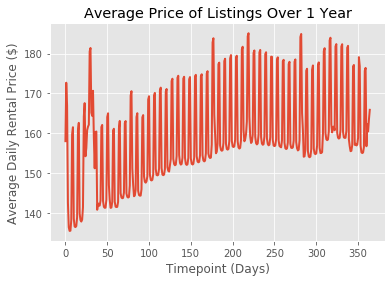

In [121]:
#Price by Date
x_axis = range(365)
y_axis = price_bydate["price"]

plt.title('Average Price of Listings Over 1 Year')
plt.plot(x_axis, y_axis,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Average Daily Rental Price ($)')

plt.savefig('Average Price of Listings Over 1 Year')
plt.show()

In [122]:
#finding number of unique listings
calendar_df['listing_id'].nunique()

2441

In [123]:
#Occupancy by Date
#Isolate booked listings
available_false = calendar_df.loc[calendar_df["available"]=="f",:]

#Group by date counting number of booked properties for that date
booked_dates = available_false.groupby('date').count()['available']
booked_dates = pd.DataFrame(booked_dates)
booked_dates.rename(columns = {'available':'booked'}, inplace = True) 
booked_dates

,booked
date,
2019-11-28,2253
2019-11-29,2302
2019-11-30,2009
2019-12-01,1188
2019-12-02,995
2019-12-03,924
2019-12-04,957
2019-12-05,1135
2019-12-06,1645


In [124]:
#Occupancy by Date
booked_dates['occupancy']=booked_dates['booked']/2441
booked_dates.head()

,booked,occupancy
date,,
2019-11-28,2253,0.922982
2019-11-29,2302,0.943056
2019-11-30,2009,0.823023
2019-12-01,1188,0.486686
2019-12-02,995,0.407620


In [125]:
#Occupancy by Date
booked_dates.reset_index()

,date,booked,occupancy
0,2019-11-28,2253,0.922982
1,2019-11-29,2302,0.943056
2,2019-11-30,2009,0.823023
3,2019-12-01,1188,0.486686
4,2019-12-02,995,0.407620
5,2019-12-03,924,0.378533
6,2019-12-04,957,0.392052
7,2019-12-05,1135,0.464973
8,2019-12-06,1645,0.673904
9,2019-12-07,1716,0.702991


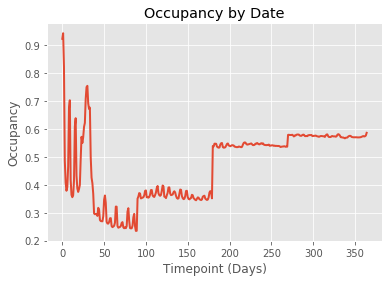

In [126]:
##Occupancy by Date
x_axis = range(365)
y_axis = booked_dates["occupancy"]

plt.title('Occupancy by Date')
plt.plot(x_axis, y_axis,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Occupancy')

plt.savefig('Occupancy by Date')
plt.show()

In [127]:
#Counting number of reviews per listing
reviews_ct = reviews_df.groupby('listing_id').count()['id']
reviews_ct = pd.DataFrame(reviews_ct)
reviews_ct.rename(columns = {'id':'reviews_count'}, inplace = True) 
reviews_ct.head()

,reviews_count
listing_id,
38585,137
80905,102
108061,88
155305,227
156805,64


In [128]:
price_bylist = calendar_df.groupby('listing_id').mean()['price']
price_bylist = pd.DataFrame(price_bylist)
price_bylist.head()

,price
listing_id,
38585,55.123288
80905,606.391781
108061,75.000000
155305,80.104110
156805,60.024658


In [129]:
merged_df = pd.merge(price_bylist, reviews_ct, on="listing_id",how="left")
merged_df.head()

,price,reviews_count
listing_id,,
38585,55.123288,137.0
80905,606.391781,102.0
108061,75.000000,88.0
155305,80.104110,227.0
156805,60.024658,64.0


In [130]:
# x_axis = merged_df["price"]
# y_axis = merged_df["reviews_count"]

# plt.scatter(x_axis,y_axis)
# plt.xlabel('Weight (g)')
# plt.ylabel('Average Tumor Volume (mm3)')

# plt.savefig('Scatter Plot for Average Price vs Reviews Count')
# plt.show()

In [131]:
# x_axis = listings_df["number_of_reviews"]
# y_axis = listings_df["price"]

# plt.title('Number of Reviews by Price')
# plt.plot(x_axis, y_axis,linewidth=2, markersize=12)
# plt.xlabel('Timepoint (Days)')
# plt.ylabel('Average Daily Rental Price ($)')

# plt.savefig('Number of Reviews by Price')
# plt.show()

In [132]:
#Adding price buckets
bins = [0, 250, 500, 750, 1000, 10000]

# Create the names for the four bins
group_names = ["250 and under", "251-500", "501-750", "751-1000", "Over 1000"]

listings_df["price_bin"] = pd.cut(listings_df["price"], bins, labels=group_names)
listings_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,occupancy,price_bin
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,55,2,137,2019-11-11,1.24,1,64,0.824658,250 and under
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59740,-82.55498,Entire home/apt,765,1,102,2019-11-10,1.02,10,347,0.049315,751-1000
2,108061,"Walk downtown or UNCA, Pets OK!",320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,88,2019-10-09,0.88,2,210,0.424658,250 and under
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57972,-82.59617,Entire home/apt,107,1,227,2019-11-18,2.24,7,347,0.049315,250 and under
4,156805,"Private Room ""Ader"" at BPS Hostel",746673,BonPaul,NaN,28806,35.57755,-82.59697,Private room,71,1,64,2019-11-02,0.64,7,345,0.054795,250 and under


In [133]:
# Occupancy by Price Bin
occup_bypricebin = listings_df.groupby('price_bin').mean()['occupancy']
occup_bypricebin = pd.DataFrame(occup_bypricebin)
occup_bypricebin.head()

,occupancy
price_bin,
250 and under,0.505988
251-500,0.323169
501-750,0.149896
751-1000,0.274315
Over 1000,0.281834


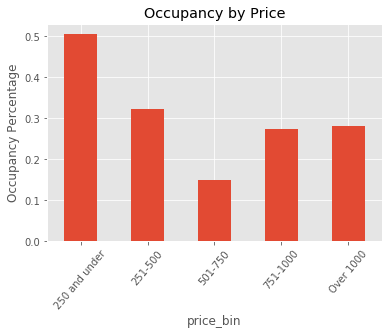

In [134]:
# Occupancy by Price Bin
also2 = occup_bypricebin.plot.bar(legend=False,rot=50)
also2
plt.ylabel("Occupancy Percentage")
plt.title("Occupancy by Price")
plt.savefig('Occupancy by Price Range')

In [135]:
# Occupancy by Average Number of Reviews
occup_byrevct = listings_df.groupby('price_bin').mean()['number_of_reviews']
occup_byrevct = pd.DataFrame(occup_byrevct)
occup_byrevct.head()

,number_of_reviews
price_bin,
250 and under,76.165971
251-500,27.378378
501-750,19.728814
751-1000,18.250000
Over 1000,6.869565


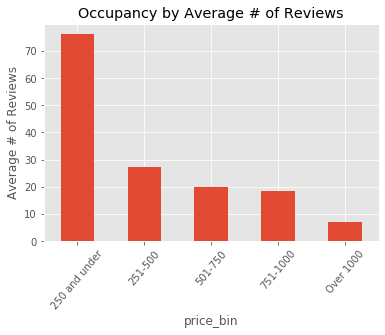

In [136]:
# Occupancy by Average Number of Reviews
also3 = occup_byrevct.plot.bar(legend=False,rot=50)
also3
plt.ylabel("Average # of Reviews")
plt.title("Occupancy by Average # of Reviews")
plt.savefig('Average # of Reviews by Price Range')

In [137]:
#Categorize listing by Room Type
roomType = listings_df.groupby('room_type').id.count()
roomType = roomType.reset_index()
roomType = roomType.rename(columns = {'id':'number_Of_Listings'})
roomType.head()

,room_type,number_Of_Listings
0,Entire home/apt,1809
1,Hotel room,19
2,Private room,602
3,Shared room,11


In [138]:
matplotlib.style.use('ggplot')

room = listings_df.room_type
r = Counter(room)

room = pd.DataFrame.from_dict(r, orient = 'index').sort_values(by = 0)
room.columns = ['room_type']

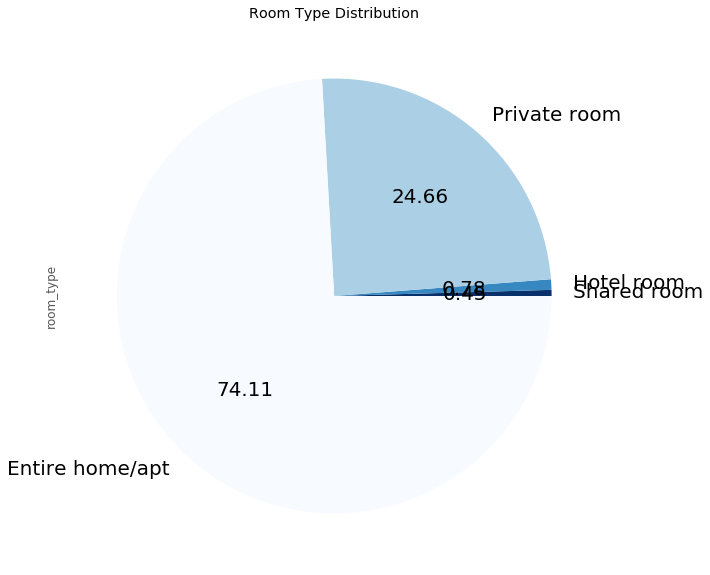

In [139]:
room.plot.pie(y = 'room_type', 
                 colormap = 'Blues_r', 
                 figsize = (10,10), 
                 fontsize = 20, autopct = '%.2f',
                 legend = False,
                 title = 'Room Type Distribution')

In [140]:
#Average Price for each type of listing
avgPrice = listings_df.groupby('room_type').price.mean()
avgPrice = avgPrice.reset_index()
avgPrice = avgPrice.rename(columns = {'price':'average_Price'})

In [141]:
avgPrice.head()

,room_type,average_Price
0,Entire home/apt,196.948590
1,Hotel room,281.526316
2,Private room,84.259136
3,Shared room,30.909091


In [142]:
average_price = sum(listings_df.price) / float(len(listings_df.price))
# standard deviation to compare 
std = np.std(listings_df.price)

In [143]:
print("Overall Average Price:", average_price)
print ("standard deviation: " + str(std))

Overall Average Price: 169.06718557968046
standard deviation: 398.9744426547513


In [144]:
#Average Price for each type of listing
def f(x):
    d = {}
    d['number_Of_Listings'] = x['id'].count()
    d['average_Price'] = x['price'].mean()
    return pd.Series(d, index=['number_Of_Listings', 'average_Price'])

listings_df.groupby('neighbourhood').apply(f)

,number_Of_Listings,average_Price
neighbourhood,,
28704,142.0,186.295775
28715,50.0,114.940000
28732,49.0,228.775510
28801,595.0,200.746218
28803,338.0,187.254438
28804,301.0,210.598007
28805,271.0,154.808118
28806,695.0,116.838849


In [145]:
nh_df = pd.DataFrame.from_dict(f, orient = 'index').sort_values(by = 0)
nh_df.plot(kind = 'bar', color = 'LightBlue', figsize = (15,8), title = 'Asheville Neighborhood Frequency', legend = False)

TypeError: object of type 'function' has no len()

(-20, 750)

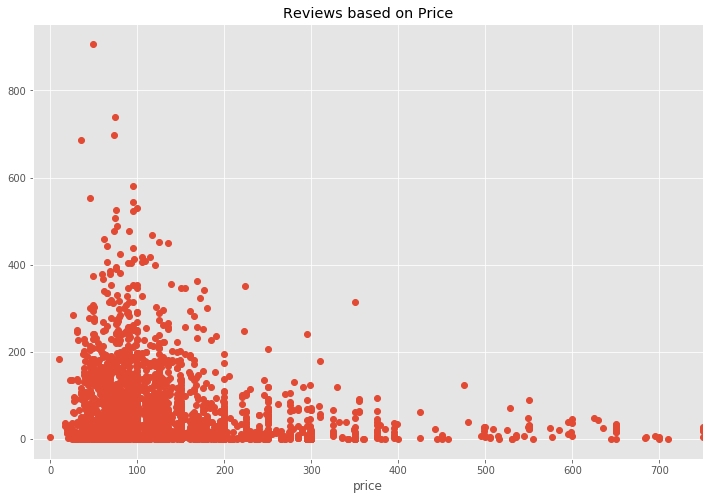

In [146]:
price_review = listings_df[['number_of_reviews', 'price']].sort_values(by = 'price')

price_review.plot(x = 'price', y = 'number_of_reviews', style = 'o', figsize =(12,8), legend = False, title = 'Reviews based on Price')
plt.xlim(-20, 750)

(-1, 6)

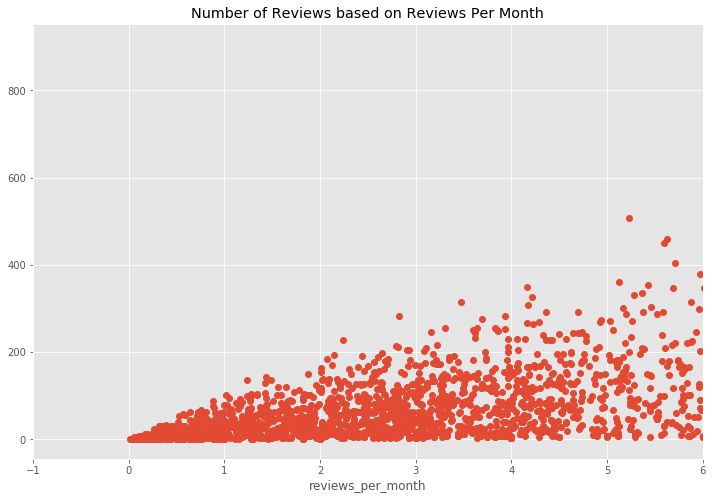

In [147]:
overall_satisfaction_review = listings_df[['number_of_reviews', 'reviews_per_month']].sort_values(by = 'reviews_per_month')

overall_satisfaction_review.plot(x = 'reviews_per_month', y = 'number_of_reviews', style = 'o', figsize =(12,8), legend = False,
                  title = 'Number of Reviews based on Reviews Per Month')
plt.xlim(-1, 6)

# Data Processing

In [178]:
new_data = listings_df[['price',
           'room_type',
           'number_of_reviews',
           'neighbourhood',
           'availability_365']]


lb_nh = LabelEncoder()
lb_rt = LabelEncoder()

#one hot encoding
oh_neighborhood = pd.get_dummies(new_data.neighbourhood).astype(int)
oh_room_type = pd.get_dummies(new_data.room_type).astype(int)

#label encoding 
le_neighborhood = lb_nh.fit_transform(new_data["neighbourhood"])
le_room_type = lb_rt.fit_transform(new_data['room_type'])

# drop the original columns and replace them with indicator columns
new_data = new_data.drop(['room_type','neighbourhood'], axis = 1)
le_data = pd.DataFrame(new_data)

le_neighborhood = pd.DataFrame(le_neighborhood)
le_room_type = pd.DataFrame(le_room_type)
le_data = pd.concat((new_data, le_room_type, le_neighborhood), axis = 1)
le_data.columns = ['price',
           'room_type',
           'number_of_reviews',
           'neighbourhood',
           'availability_365']

new_data = pd.concat((new_data, oh_room_type, oh_neighborhood), axis = 1)
le_data = le_data.dropna(axis=0, how='any')
new_data = new_data[:le_data.shape[0]]

In [149]:
new_data.head() 

,price,number_of_reviews,availability_365,Entire home/apt,Hotel room,Private room,Shared room,28704,28715,28732,28801,28803,28804,28805,28806
0,55,137,64,0,0,1,0,0,0,0,0,0,1,0,0
1,765,102,347,1,0,0,0,0,0,0,1,0,0,0,0
2,75,88,210,1,0,0,0,0,0,0,1,0,0,0,0
3,107,227,347,1,0,0,0,0,0,0,0,0,0,0,1
4,71,64,345,0,0,1,0,0,0,0,0,0,0,0,1


In [150]:
le_data.head()

,price,room_type,number_of_reviews,neighbourhood,availability_365
0,55,137,64,2,5
1,765,102,347,0,3
2,75,88,210,0,3
3,107,227,347,0,7
4,71,64,345,2,7


In [180]:
#split the data and set price as target variable
y = new_data['price']
X = new_data.drop(['price'],axis=1)

#standarize the dataset
X_std = StandardScaler().fit_transform(X)

# call PCA 
pca = PCA(n_components = 14)
pca.fit(X_std)
print('Components:\n ', pca.components_)
print('Explained Variance Ratio:\n ', pca.explained_variance_ratio_)

Components:
  [[ 3.26442369e-02 -1.91782077e-01 -6.86206369e-01  7.50599843e-02
   6.75515374e-01  4.19575459e-02 -5.35011177e-02 -2.77552047e-02
  -5.99813232e-03  9.43471149e-02 -2.80226255e-03 -1.13668677e-01
   4.53546215e-02  1.95239199e-03]
 [-4.71194419e-02  2.24904347e-01 -6.98793954e-03  3.17533449e-01
  -5.47053298e-02 -1.88699135e-02  2.96709129e-02  6.66581478e-03
  -3.85434852e-05  6.54310945e-01  7.80112928e-03  2.86651251e-02
  -3.61499639e-02 -6.41666382e-01]
 [ 1.67164339e-01  1.18927046e-01  3.12996627e-02  1.79290370e-01
  -7.24655318e-02  2.64142169e-02 -1.79703572e-01 -8.44046890e-02
  -1.07549105e-01  4.19428909e-01 -4.62725112e-01 -2.90933264e-01
  -3.17099073e-01  5.40948529e-01]
 [ 9.90866918e-02  1.06700248e-01 -5.65076518e-02 -1.33869124e-01
   4.54807307e-02  2.52513011e-01  1.62045731e-02 -1.97316929e-02
  -2.97381406e-02 -3.22384396e-02 -6.75882025e-01  5.75184877e-01
   3.08822484e-01 -7.90596338e-02]
 [ 5.29097579e-01  4.18834052e-02  8.66289383e-02 -1.7

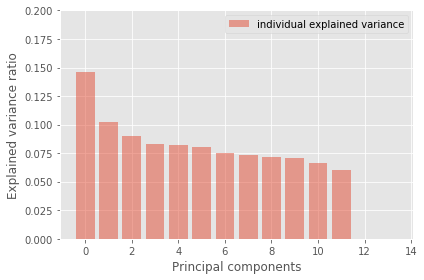

In [181]:
#plot explained variance 
plt.bar(range(pca.explained_variance_ratio_.shape[0]), pca.explained_variance_ratio_, alpha = 0.5, 
        align = 'center', label = 'individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.ylim(0, 0.2)
plt.legend(loc = 'best')
plt.tight_layout()

In [182]:
s1 = sum(pca.explained_variance_ratio_[:17])
s2 = sum(pca.explained_variance_ratio_[17:])

In [184]:
# dimensionality reduction, keeping only
# 17 principal component
pca = PCA(n_components = 14)
X_pca = pca.fit_transform(X_std)
# inverse transform to obtain the projected data
X_new = pca.inverse_transform(X_pca)

In [185]:
print("Percentage of information on the components that we keep:",s1,"\nPercentage of information of the components that we discard:",s2)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

Percentage of information on the components that we keep: 0.9999999999999999 
Percentage of information of the components that we discard: 0
original shape:    (2441, 14)
transformed shape: (2441, 14)


# linear regression

In [189]:
import time
split_data = new_data.drop(['price'], axis = 1)
X_train, X_test, y_train, y_test = model_selection.train_test_split(split_data,
                                                y, 
                                                test_size=0.3,
                                                train_size = 0.7,
                                                random_state=13)
pipe1 = Pipeline([
    ('standardize', StandardScaler()),
    ('pca', PCA(n_components = 14)),
    ('linear', linear_model.LinearRegression())
])
pipe1.fit(X_train, y_train)
y_pred1 = pipe1.predict(X_test)

linear_reg_error1 = metrics.median_absolute_error(y_test, y_pred1) 

# pipeline without PCA
pipe2 = Pipeline([
    ('standardize', StandardScaler()),
    ('linear', linear_model.LinearRegression())
])
start = time.time()
pipe2.fit(X_train, y_train)
y_pred2 = pipe2.predict(X_test)

linear_reg_error2 = metrics.median_absolute_error(y_test, y_pred2) 

In [190]:
print ("Linear Regression's price deviation with PCA: " + str(linear_reg_error1))
print ("Linear Regression's price deviation without PCA: " + str(linear_reg_error2))

Linear Regression's price deviation with PCA: 69.42511564105892
Linear Regression's price deviation without PCA: 70.0380384035225


In [191]:
from sklearn.metrics import r2_score
print("R-squared Error with PCA:",r2_score(y_test,y_pred1))
print("R-squared Error without PCA:",r2_score(y_test,y_pred2))

R-squared Error with PCA: 0.02699111891813888
R-squared Error without PCA: 0.02723719769038635


In [196]:
y = round(new_data['number_of_reviews'])
split_data = new_data.drop(['number_of_reviews'], axis = 1)
X_train, X_test, y_train, y_test = model_selection.train_test_split(split_data,
                                                y, 
                                                test_size=0.3,
                                                train_size = 0.7,
                                                random_state=13)
pipe1 = Pipeline([
    ('standardize', StandardScaler()),
    ('pca', PCA(n_components = 14)),
    ('logistic', linear_model.LogisticRegression(C = 1e5))
])
start = time.time()

pipe1.fit(X_train, y_train)
y_pred1 = pipe1.predict(X_test)
end = time.time()
print(end - start)

# pipeline without PCA
pipe2 = Pipeline([
    ('standardize', StandardScaler()),
    ('logistic', linear_model.LogisticRegression(C = 1e5))
])
start = time.time()

pipe2.fit(X_train, y_train)
y_pred2 = pipe2.predict(X_test)
end = time.time()
print(end - start)

C:\Users\Shweta.Kalavar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shweta.Kalavar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Shweta.Kalavar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Shweta.Kalavar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sh

2.4934334754943848
2.381714344024658


C:\Users\Shweta.Kalavar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [197]:
print('Logistic Regression Accuracy with PCA:',sum(y_test == y_pred1)," / ", sum(y_test==y_test) ,'=' , sum(y_test == y_pred1)/sum(y_test==y_test)*100 , "%\n")
print('Logistic Regression Accuracy without PCA:',sum(y_test == y_pred2)," / ", sum(y_test==y_test) ,'=' , sum(y_test == y_pred2)/sum(y_test==y_test)*100 , "%\n")

Logistic Regression Accuracy with PCA: 41  /  733 = 5.5934515688949515 %

Logistic Regression Accuracy without PCA: 41  /  733 = 5.5934515688949515 %



# PCA usign Label encoding

In [199]:
X = le_data.drop(['price'],axis=1)
#standarize the dataset
X_std = StandardScaler().fit_transform(X)

# call PCA specifying we only want the

pca = PCA(n_components =4)
pca.fit(X_std)

# important information
print('Components:\n ', pca.components_)
print('Explained Variance Ratio:\n ', pca.explained_variance_ratio_)

Components:
  [[ 0.06446488 -0.69014842  0.63239945  0.34584731]
 [ 0.75690737  0.22732077 -0.15347625  0.59317918]
 [ 0.52705868  0.22674858  0.53355088 -0.62138369]
 [ 0.38097857 -0.64854106 -0.54022165 -0.37737302]]
Explained Variance Ratio:
  [0.29118563 0.26687776 0.23934775 0.20258886]


In [200]:
s1 = sum(pca.explained_variance_ratio_[:3])
s2 = sum(pca.explained_variance_ratio_[3:])

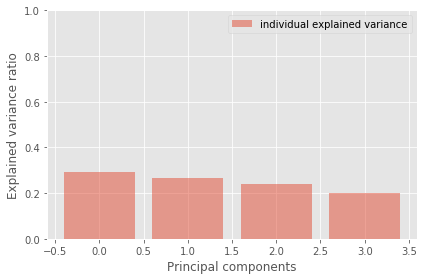

In [201]:
plt.bar(range(pca.explained_variance_ratio_.shape[0]), pca.explained_variance_ratio_, alpha = 0.5, 
        align = 'center', label = 'individual explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.ylim(0, 1)
plt.legend(loc = 'best')
plt.tight_layout()

In [202]:
# the first principal component
pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X_std)

# inverse transform to obtain the projected data
# and compare with the original
X_new = pca.inverse_transform(X_pca)

In [203]:
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)
print("Percentage of information on the components that we keep:",s1,"\nPercentage of information of the components that we discard:",s2)

original shape:    (2441, 4)
transformed shape: (2441, 3)
Percentage of information on the components that we keep: 0.7974111354940395 
Percentage of information of the components that we discard: 0.20258886450596045


# Linear Regression with/without PCA (label encoding)

In [205]:
import time

start = time.time()
split_data = le_data.drop(['price'], axis = 1)
X_train, X_test, y_train, y_test = model_selection.train_test_split(split_data,
                                                y, 
                                                test_size=0.3,
                                                train_size = 0.7,
                                                random_state=13)
pipe1 = Pipeline([
    ('standardize', StandardScaler()),
    ('pca', PCA(n_components = 4)),
    ('linear', linear_model.LinearRegression())
])
pipe1.fit(X_train, y_train)
y_pred1 = pipe1.predict(X_test)

linear_reg_error1 = metrics.median_absolute_error(y_test, pipe1.predict(X_test)) 

# pipeline without PCA

pipe2 = Pipeline([
    ('standardize', StandardScaler()),
    ('linear', linear_model.LinearRegression())
])
pipe2.fit(X_train, y_train)
y_pred2 = pipe2.predict(X_test)

linear_reg_error2 = metrics.median_absolute_error(y_test, pipe2.predict(X_test))

In [206]:
print ("Linear Regression deviation with PCA: " + str(linear_reg_error1))
print ("Linear Regression deviation without PCA: " + str(linear_reg_error2))

Linear Regression deviation with PCA: 1.1368683772161603e-13
Linear Regression deviation without PCA: 1.4210854715202004e-14


In [207]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("R-squared Error with PCA:",r2_score(y_test,y_pred1))
print("R-squared Error without PCA:",r2_score(y_test,y_pred2))

R-squared Error with PCA: 1.0
R-squared Error without PCA: 1.0


# logistic regression with/without pca (label encoding)

In [208]:
y = round(le_data['number_of_reviews'])
split_data = le_data.drop(['number_of_reviews'], axis = 1)
X_train, X_test, y_train, y_test = model_selection.train_test_split(split_data,
                                                y, 
                                                test_size=0.3,
                                                train_size = 0.7,
                                                random_state=13)
pipe1 = Pipeline([
    ('standardize', StandardScaler()),
    ('pca', PCA(n_components = 4)),
    ('logistic', linear_model.LogisticRegression(C = 1e5))
])

start = time.time()
pipe1.fit(X_train, y_train)
y_pred1 = pipe1.predict(X_test)
end = time.time()
print(end - start)

# pipeline without PCA
pipe2 = Pipeline([
    ('standardize', StandardScaler()),
    ('logistic', linear_model.LogisticRegression(C = 1e5))
])
start = time.time()

pipe2.fit(X_train, y_train)
y_pred2 = pipe2.predict(X_test)
end = time.time()
print(end - start)


C:\Users\Shweta.Kalavar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shweta.Kalavar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.8385674953460693


C:\Users\Shweta.Kalavar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shweta.Kalavar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.7555656433105469


In [209]:
print('Logistic Regression Accuracy with PCA:',sum(y_test == y_pred1)," / ", sum(y_test==y_test) ,'=' , sum(y_test == y_pred1)/sum(y_test==y_test)*100 , "%\n")
print('Logistic Regression Accuracy without PCA:',sum(y_test == y_pred2)," / ", sum(y_test==y_test) ,'=' , sum(y_test == y_pred2)/sum(y_test==y_test)*100 , "%\n")

Logistic Regression Accuracy with PCA: 83  /  733 = 11.323328785811732 %

Logistic Regression Accuracy without PCA: 83  /  733 = 11.323328785811732 %

